# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness);
- [данные по фильмам и сериалам Netflix](https://www.kaggle.com/shivamb/netflix-shows).

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


In [412]:
import matplotlib.pyplot as plt
import pandas as pd
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6
# Данные по фильмам и сериалам Netflix
df = pd.read_csv('D:/DATA_SCIENCE/dataset/16_dz_visualisation/netflix_titles.csv', sep=',')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [413]:
df_movie = df.loc[df.type == 'Movie'].release_year.value_counts()
df_tv = df.loc[df.type == 'TV Show'].release_year.value_counts()
dinamic_type = pd.concat([df_movie, df_tv], axis = 1)
dinamic_type.columns = ['фильмы', 'тв-шоу']
dinamic_type.head()

,фильмы,тв-шоу
1925,NaN,1.0
1942,2.0,NaN
1943,3.0,NaN
1944,3.0,NaN
1945,3.0,NaN


In [395]:
# Визуализируем динамику кол-ва фильмов и передач

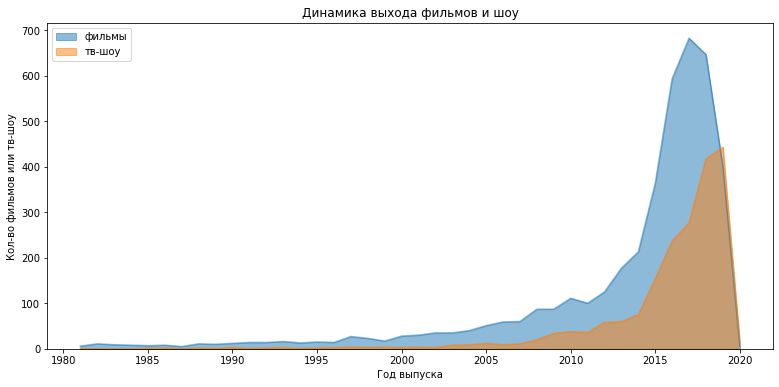

In [396]:
ax = dinamic_type.loc[dinamic_type.index > 1980].plot(kind = 'area', title='Динамика выхода фильмов и шоу',\
                                                           stacked=False, xlabel ='Год выпуска',\
                                                           ylabel ='Кол-во фильмов или тв-шоу')

Вывод:
* за период наблюдений наблюдается схожая динамика роста кол-ва фильмов и тв-шоу.
* кол-во фильмов всегда превышало кол-во тв-шоу, но особенно резко увеличился разрыв в 2014 -2017 гг. Может быть это связано с развитием кинематографа в, так называемых, "странах третьего мира".
* в 2019 г. кол-во тв-шоу превзошло кол-во фильмов. Может быть это связано с развитием телевизионной аппаратуры (домашних кинотеатров), развитием интернет тв.
    

In [397]:
# Построим гистограмму распределения фильмов и тв-шоу

In [398]:
hist_year = df.release_year.value_counts()

<AxesSubplot:title={'center':'Распределение выхода фильмов и тв-шоу'}, ylabel='Frequency'>

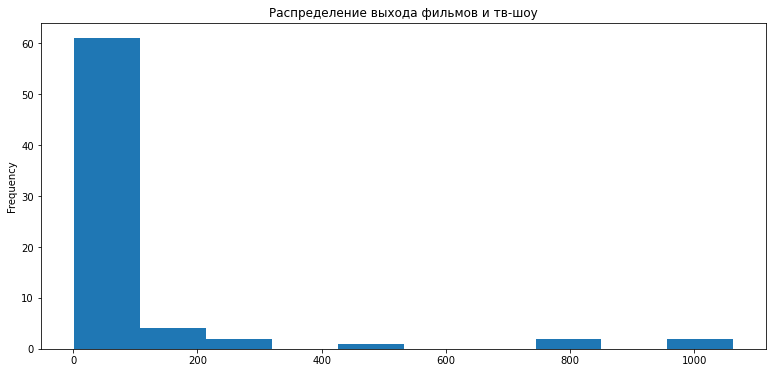

In [399]:
hist_year.plot.hist(title = 'Распределение выхода фильмов и тв-шоу')

Вывод: 
* Большую часть рассматриваемого периода выходило менее 100 фильмов в год
* В последнее десятилетие выходит около 1000 фильмов в год

# Столбчатая диаграмма 'Сравнение кол-ва фильмов и тв-шоу сделанных с участием США и без него'

In [400]:
G5 = df[df.country.str.contains('United States', na=False, regex=True) == False].loc[df.release_year > 2000].show_id.count()
G4 = df[df.country.str.contains('United States', na=False, regex=True) == False].loc[(df.release_year > 1980) & (df.release_year <= 2000)].show_id.count()
G3 = df[df.country.str.contains('United States', na=False, regex=True) == False].loc[(df.release_year > 1960) & (df.release_year <= 1980)].show_id.count()
G2 = df[df.country.str.contains('United States', na=False, regex=True) == False].loc[(df.release_year > 1940) & (df.release_year <= 1960)].show_id.count()
G1 = df[df.country.str.contains('United States', na = False, regex=True) == False].loc[df.release_year <= 1940].show_id.count()
G5_ = df[df.country.str.contains('United States', na=False, regex=True)].loc[df.release_year > 2000].show_id.count()
G4_ = df[df.country.str.contains('United States', na=False, regex=True)].loc[(df.release_year > 1980) & (df.release_year <= 2000)].show_id.count()
G3_ = df[df.country.str.contains('United States', na=False, regex=True)].loc[(df.release_year > 1960) & (df.release_year <= 1980)].show_id.count()
G2_ = df[df.country.str.contains('United States', na=False, regex=True)].loc[(df.release_year > 1940) & (df.release_year <= 1960)].show_id.count()
G1_ = df[df.country.str.contains('United States', na=True, regex=True)].loc[df.release_year <= 1940].show_id.count()
G = pd.DataFrame({'years':('1925-1940', '1941-1960', '1961-1980', '1981-2000', '2001-2020'),'United States':(G1_, G2_, G3_, G4_, G5_), 'Other_country':(G1, G2, G3, G4, G5)})
G.groupby('years')

<AxesSubplot:title={'center':'Сравнение кол-ва фильмов и тв-шоу сделанных с участием США и без него'}, xlabel='years', ylabel='Кол-во фильмов и тв-шоу'>

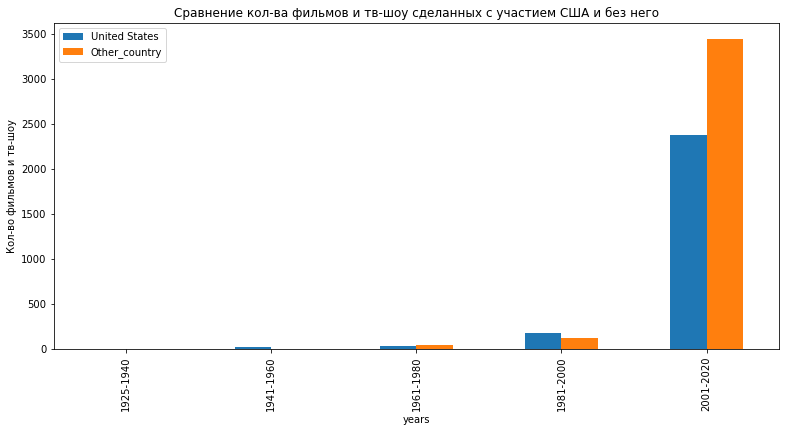

In [401]:
G.plot.bar(title = 'Сравнение кол-ва фильмов и тв-шоу сделанных с участием США и без него', x = 'years', ylabel = 'Кол-во фильмов и тв-шоу')

Вывод:
* Кол-во фильмов и ТВ-шоу производства США за последние 20 лет значительно уступает кол-ву фильмов, сделанных в других странах.
* Связано с развитием киноиндустрии и медиаконтента в Китае, Индии и др. странах.

In [402]:
# Визуализируем долю комедий

In [403]:
comedy = df[df.listed_in.str.contains('Comedies'or'Comedy', na=False, regex=True)].show_id.count()/len(df)*100
adventure = df[df.listed_in.str.contains('Adventure', na=False, regex=True)].show_id.count()/len(df)*100
other = 100 - (comedy + adventure)
ax = pd.DataFrame({'доля фильмов %': (comedy,  adventure, other)},  index = ['comedy',  'adventure', 'other'])
ax

,доля фильмов %
comedy,24.84761
adventure,11.59769
other,63.55470


<AxesSubplot:title={'center':'доля комедий и приключений'}, ylabel='доля фильмов %'>

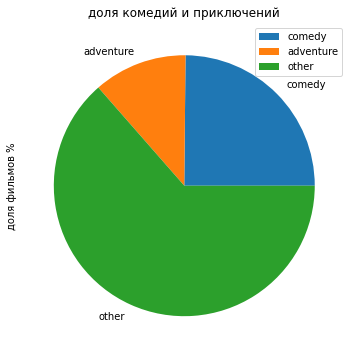

In [404]:
ax.plot.pie(title = 'доля комедий и приключений', y = 'доля фильмов %')

Вывод: Доля комедий занимает 1/4 всех фильмов и привмерно в 2 раза превышает долю приключенческих фильмов

In [405]:
Crime = df[df.listed_in.str.contains('Crime', na=False, regex=True)]['release_year'].value_counts()
Thrillers = df[df.listed_in.str.contains('Thrillers', na=False, regex=True)]['release_year'].value_counts()
pd.DataFrame({'Crime': (Crime), 'Thrillers':(Thrillers)}).describe()

,Crime,Thrillers
count,18.000000,32.000000
mean,20.166667,13.625000
std,30.374622,21.625478
min,1.000000,1.000000
25%,1.000000,2.000000
50%,5.500000,4.500000
75%,22.250000,8.500000
max,91.000000,77.000000


<AxesSubplot:>

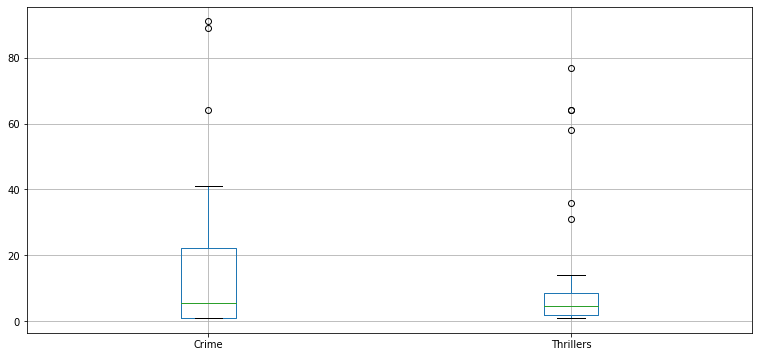

In [406]:
pd.DataFrame({'Crime': (Crime), 'Thrillers':(Thrillers)}).plot.box(grid = True)

Вывод:
* Кол-во криминальных фильмов и ТВ-шоу примерно в 2 раза превышает кол-во триллеров, при этом среднее кол-во в год примерно равно.
* Людям нравится криминальные сюжеты больше, чем триллеры (жизнь страшнее фильмов).      
    

In [407]:
import seaborn as sns

In [408]:
df_rating = df.groupby(by = ['rating', 'release_year']).show_id.count() #.loc[df.release_year > 1960]

In [409]:
df_rating = pd.DataFrame(df_rating).pivot_table(
                        index='release_year', 
                        columns='rating', 
                        values='show_id', 
                        aggfunc=sum).fillna(0)

<AxesSubplot:xlabel='rating', ylabel='release_year'>

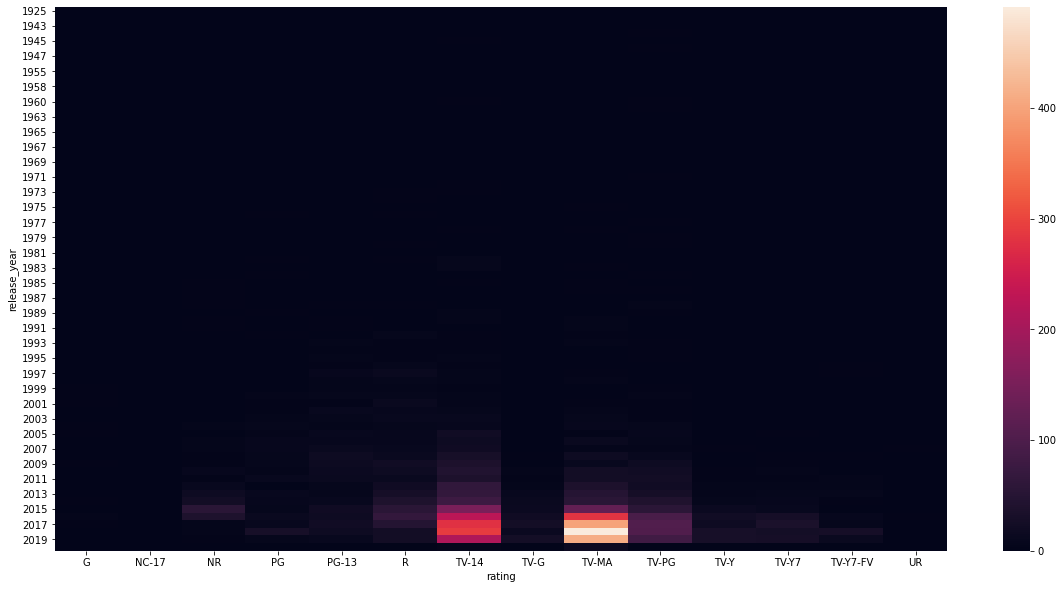

In [410]:
rcParams['figure.figsize'] = 20,10
sns.heatmap(df_rating)

Вывод:
* Список фильмов и тв-шоу составлен в основном на основе рейтинга TV-14 и TV-МА.